# Exploring the Data

#### 
**The next step is to clean our language data from Reddit and look for insights that will help us understand the data and make better models.**
#### 

These are the imports we will use in this section:

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.feature_extraction.text import CountVectorizer
import contractions
import seaborn as sns
import matplotlib.pyplot as plt

#  
We can now import our csv file that contains the 5000 posts we pulled from the "depression" and "bipolar" subreddit pages and then combine them into one DataFrame:

In [2]:
depression = pd.read_csv('../data/depression.csv')
depression

,selftext,subreddit,title
0,I am now homeless and my phone service will tu...,depression,I am seriously fucked
1,People always describe their depression as con...,depression,My brain feels clogged
2,I've been struggling really hard with this. Wh...,depression,I'm considering dropping out of college becaus...
3,So Its been 1 year I had my future secure and ...,depression,Do I have depression?
4,I'm 15 yrs old and I just need some help.\n\nT...,depression,I don't what to do
...,...,...,...
4995,"I am 25, live at home, currently unemployed, h...",depression,My story is not special and I don't deserve sy...
4996,I can't remember a time where I was truly happ...,depression,Does anyone else feel like depression robbed y...
4997,2015 was a year of such clearly defined ‘highs...,depression,Why did life have to become like assembling IK...
4998,"I'm not a doctor, but I've been to enough psyc...",depression,The definition of depression


In [3]:
bipolar = pd.read_csv('../data/bipolar.csv')
bipolar

,selftext,subreddit,title
0,"I also have fibromyalgia, and my acute pain ep...",bipolar,I didn’t let my back pain send me into a depre...
1,In case others don't put 2 and 2 together like...,bipolar,Seroquel as antihistamine. I should have known...
2,"TLDR: newly diagnosed, wondering how to deal w...",bipolar,how do you deal with the grief and anger that ...
3,"Hello, I wanted to share some symptoms I have ...",bipolar,Meds and fatigue
4,Hi y'all. I just wanted to share because I'm p...,bipolar,Annoyed that I'm probably falling up into a hy...
...,...,...,...
4995,I honestly love the flavour of them!\n\nI star...,bipolar,Energy Crisis is it worth it?
4996,Three days on the trot I've been unable to sle...,bipolar,Can feel myself going full manic
4997,Just wanted to say that I have been feeling go...,bipolar,I'm doing good :D.
4998,Hey guys. I just wanted to ask you if you've e...,bipolar,suicidal thoughts at night


In [4]:
df = depression.append(bipolar)

# 
Now we have our data, but the index needs to be reset:

In [5]:
df = df.reset_index(drop = True)

In [6]:
df.tail(2)

,selftext,subreddit,title
9998,Hey guys. I just wanted to ask you if you've e...,bipolar,suicidal thoughts at night
9999,"Hey, all!\n\nI posted a few days ago about how...",bipolar,Don't know what to do about my meds/treatment


# 
Using the contractions library we imported, we expand contractions and put the resulting strings in a new column called 'expanded':

In [7]:
df['selftext'] = df['selftext'].apply(lambda x: contractions.fix(x))

In [8]:
df.head(2)

,selftext,subreddit,title
0,I am now homeless and my phone service will tu...,depression,I am seriously fucked
1,People always describe their depression as con...,depression,My brain feels clogged


# 
Now we create a column with the posts broken down into a list of words:

In [9]:
df['tokenized'] = df['selftext'].apply(lambda x: word_tokenize(x.lower()))

In [10]:
df.head(2)

,selftext,subreddit,title,tokenized
0,I am now homeless and my phone service will tu...,depression,I am seriously fucked,"[i, am, now, homeless, and, my, phone, service..."
1,People always describe their depression as con...,depression,My brain feels clogged,"[people, always, describe, their, depression, ..."


# 
Let's lemmatize our tokens as well. This returns some words to a more base form:

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
df['tokenized'] = df['tokenized'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])

In [13]:
df.tail(2)

,selftext,subreddit,title,tokenized
9998,Hey guys. I just wanted to ask you if you have...,bipolar,suicidal thoughts at night,"[hey, guy, ., i, just, wanted, to, ask, you, i..."
9999,"Hey, all!\n\nI posted a few days ago about how...",bipolar,Don't know what to do about my meds/treatment,"[hey, ,, all, !, i, posted, a, few, day, ago, ..."


# 
We want to get rid of punctuation as well:

In [14]:
import string

In [15]:
df['tokenized'] = df['tokenized'].apply(lambda x: [i.strip(string.punctuation) for i in x])

In [16]:
df.head(2)

,selftext,subreddit,title,tokenized
0,I am now homeless and my phone service will tu...,depression,I am seriously fucked,"[i, am, now, homeless, and, my, phone, service..."
1,People always describe their depression as con...,depression,My brain feels clogged,"[people, always, describe, their, depression, ..."


# 
This step removes empty strings left from removed punctuation:

In [17]:
df['tokenized'] = df['tokenized'].apply(lambda x:[i for i in x if i])

In [18]:
df.tail(2)

,selftext,subreddit,title,tokenized
9998,Hey guys. I just wanted to ask you if you have...,bipolar,suicidal thoughts at night,"[hey, guy, i, just, wanted, to, ask, you, if, ..."
9999,"Hey, all!\n\nI posted a few days ago about how...",bipolar,Don't know what to do about my meds/treatment,"[hey, all, i, posted, a, few, day, ago, about,..."


# 
We're only interested in the content of the posts so we drop the title column:

In [19]:
df.drop(columns = ['title'], inplace = True)

In [20]:
df.head(2)

,selftext,subreddit,tokenized
0,I am now homeless and my phone service will tu...,depression,"[i, am, now, homeless, and, my, phone, service..."
1,People always describe their depression as con...,depression,"[people, always, describe, their, depression, ..."


# 
Let's also create a column for the newly formatted words combined into single strings:

In [21]:
df['sentences'] = df['tokenized'].apply(lambda x: ' '.join(x))

In [22]:
df.head(2)

,selftext,subreddit,tokenized,sentences
0,I am now homeless and my phone service will tu...,depression,"[i, am, now, homeless, and, my, phone, service...",i am now homeless and my phone service will tu...
1,People always describe their depression as con...,depression,"[people, always, describe, their, depression, ...",people always describe their depression a cons...


# 
It might be interesting to see how word count correlates with our other data so let's create a word count column using the len() function:

In [23]:
df['word_count'] = df['tokenized'].apply(lambda x: len(x))

In [24]:
df.head(2)

,selftext,subreddit,tokenized,sentences,word_count
0,I am now homeless and my phone service will tu...,depression,"[i, am, now, homeless, and, my, phone, service...",i am now homeless and my phone service will tu...,234
1,People always describe their depression as con...,depression,"[people, always, describe, their, depression, ...",people always describe their depression a cons...,155


# 
Lastly, we will binarize the 'subreddit' column (this will be our dependent variable in our model):

In [25]:
df['subreddit'] = df['subreddit'].apply(lambda x: 1 if x == 'bipolar' else 0)

In [26]:
df.head()

,selftext,subreddit,tokenized,sentences,word_count
0,I am now homeless and my phone service will tu...,0,"[i, am, now, homeless, and, my, phone, service...",i am now homeless and my phone service will tu...,234
1,People always describe their depression as con...,0,"[people, always, describe, their, depression, ...",people always describe their depression a cons...,155
2,I have been struggling really hard with this. ...,0,"[i, have, been, struggling, really, hard, with...",i have been struggling really hard with this w...,394
3,So Its been 1 year I had my future secure and ...,0,"[so, it, been, 1, year, i, had, my, future, se...",so it been 1 year i had my future secure and w...,105
4,I am 15 yrs old and I just need some help.\n\n...,0,"[i, am, 15, yr, old, and, i, just, need, some,...",i am 15 yr old and i just need some help thing...,154


In [27]:
df['tokenized'] = df['tokenized'].apply(lambda x: [i for i in x if i not in stopwords.words('english')])

In [28]:
df

,selftext,subreddit,tokenized,sentences,word_count
0,I am now homeless and my phone service will tu...,0,"[homeless, phone, service, turn, really, soon,...",i am now homeless and my phone service will tu...,234
1,People always describe their depression as con...,0,"[people, always, describe, depression, constan...",people always describe their depression a cons...,155
2,I have been struggling really hard with this. ...,0,"[struggling, really, hard, graduated, high, sc...",i have been struggling really hard with this w...,394
3,So Its been 1 year I had my future secure and ...,0,"[1, year, future, secure, well, wa, going, goo...",so it been 1 year i had my future secure and w...,105
4,I am 15 yrs old and I just need some help.\n\n...,0,"[15, yr, old, need, help, thing, pretty, shit,...",i am 15 yr old and i just need some help thing...,154
...,...,...,...,...,...
9995,I honestly love the flavour of them!\n\nI star...,1,"[honestly, love, flavour, started, redbull, re...",i honestly love the flavour of them i started ...,130
9996,Three days on the trot I have been unable to s...,1,"[three, day, trot, unable, sleep, eat, getting...",three day on the trot i have been unable to sl...,132
9997,Just wanted to say that I have been feeling go...,1,"[wanted, say, feeling, good, last, couple, wee...",just wanted to say that i have been feeling go...,107
9998,Hey guys. I just wanted to ask you if you have...,1,"[hey, guy, wanted, ask, ever, problem, done, d...",hey guy i just wanted to ask you if you have e...,339


# 
We can save the cleaned data now:

In [29]:
df.to_csv('../data/depression_bipolar_cleaned.csv', index = False)

## Exploratory Data Analysis

# 
##### **From here we can vectorize our data and look more closely at individual words using Count Vectorize:**

In [30]:
cvec = CountVectorizer(stop_words='english')

In [31]:
vector = cvec.fit_transform(df['sentences'])

In [32]:
vector_df = pd.DataFrame(vector.todense(), 
                          columns=cvec.get_feature_names())

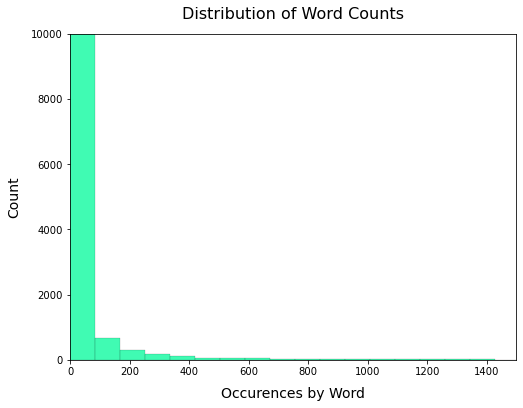

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.histplot(ax=ax, x = vector_df.sum(), bins = 300, color = 'mediumspringgreen')
ax.set_title('Distribution of Word Counts', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
ax.set_ylabel('Count', fontsize = 14)
ax.set_xlabel('Occurences by Word', fontsize = 14)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10  
ax.set(xlim = (0, 1500))
ax.set(ylim = (0, 10000))
plt.savefig('../images/word_count_distribution.png', dpi = 300, bbox_inches = "tight", transparent = True)
plt.show()

# 
So let's simulate what would happen if we were to limit the amount of features and limit the thresholds for word occurences:

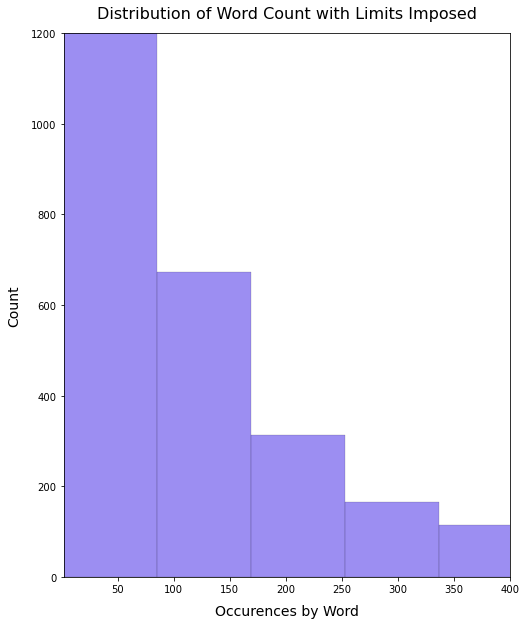

In [174]:
fig, ax = plt.subplots(1, 1, figsize=(8,10))
sns.histplot(ax=ax, x = vector_df.sum(), bins = 300, color = 'mediumslateblue')
ax.set_title('Distribution of Word Count with Limits Imposed', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
ax.set_ylabel('Count', fontsize = 14)
ax.set_xlabel('Occurences by Word', fontsize = 14)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10  
ax.set(xlim = (2, 400))
ax.set(ylim = (0, 1200))
plt.savefig('../images/limited_word_count_distribution.png', dpi = 300, bbox_inches = "tight", transparent = True)
plt.show()

### 
As we can see, as we impose limits on our terms the distribution starts to make more sense. Our model should do this naturally but we'll have to refine the parameters to help it.

# 
Let's look at our most common words in the dataset:

In [154]:
top_20 = vector_df.sum().sort_values(ascending=True).tail(20)
top_20

depression     5455
make           5605
think          5976
friend         6152
going          6356
ha             6601
did            6753
people         7091
thing          8125
day            8157
really         8322
life           8793
year           8864
want          10431
time          10957
know          11269
feel          15226
like          17140
just          20613
wa            25180
dtype: int64

#  
Let's plot the top 20 values:

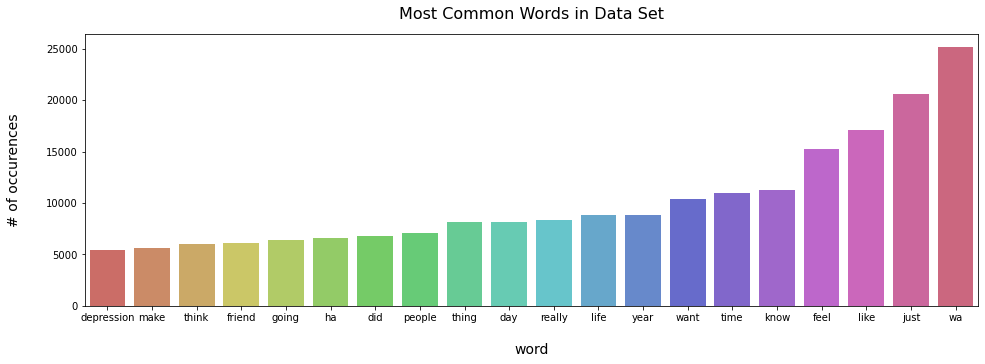

In [155]:
fig, ax = plt.subplots(1,1, figsize = (16, 5))
ax = sns.barplot(ax = ax, x = top_20.index, y = top_20.values, palette = 'hls')
ax.set_title('Most Common Words in Data Set', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
ax.set_ylabel('# of occurences', fontsize = 14)
ax.set_xlabel('word', fontsize = 14)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 25 
ax.set_xticklabels(top_20.index, fontsize = 10)
plt.savefig('../images/top_words_bar.png', dpi = 300, bbox_inches = "tight", transparent = True)
plt.show()

### 
Obviously we might want to look into what "wa" means and also consider whether depression should be used in our models, but most likely these terms will be filtered out by our gridsearch.
### 

### Sentiment Analysis

We should also take a look at the sentiment ratings for our posts. This could illuminate some things and help us understand our data better.
### 

Let's get a dataframe of all the sentimentality scores and combine it with the original dataframe using `pd.concat`:

In [156]:
sent = SentimentIntensityAnalyzer()

In [157]:
sentiment_scores = pd.DataFrame(df['sentences'].apply(lambda x: sent.polarity_scores(x)).tolist())

In [158]:
sent_df = pd.concat([df, sentiment_scores], axis = 1, ignore_index=False)

In [166]:
sent_df.head()

,selftext,subreddit,tokenized,sentences,word_count,neg,neu,pos,compound
0,I am now homeless and my phone service will tu...,0,"[homeless, phone, service, turn, really, soon,...",i am now homeless and my phone service will tu...,234,0.172,0.812,0.015,-0.9896
1,People always describe their depression as con...,0,"[people, always, describe, depression, constan...",people always describe their depression a cons...,155,0.239,0.707,0.054,-0.9854
2,I have been struggling really hard with this. ...,0,"[struggling, really, hard, graduated, high, sc...",i have been struggling really hard with this w...,394,0.162,0.694,0.145,-0.6545
3,So Its been 1 year I had my future secure and ...,0,"[1, year, future, secure, well, wa, going, goo...",so it been 1 year i had my future secure and w...,105,0.187,0.655,0.159,-0.7513
4,I am 15 yrs old and I just need some help.\n\n...,0,"[15, yr, old, need, help, thing, pretty, shit,...",i am 15 yr old and i just need some help thing...,154,0.210,0.711,0.079,-0.9716


# 
Let's visualize the distributions of the compound score (aggregated sentiment rating):

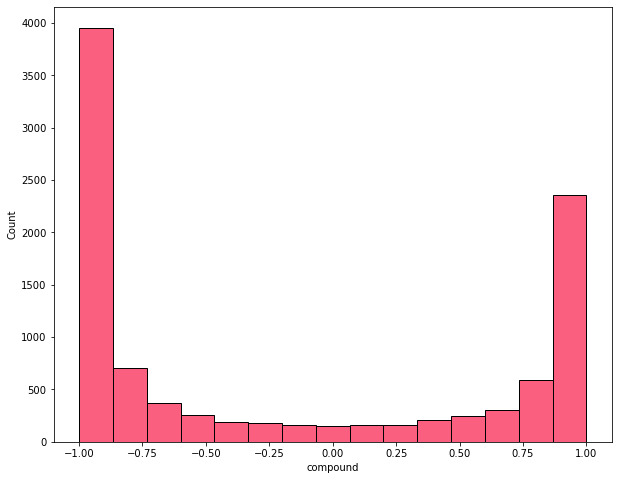

In [182]:
fig, ax = plt.subplots(1,1, figsize = (10, 8))
ax = sns.histplot(sent_df['compound'], color = 'xkcd:red pink', ax = ax)
plt.show()

### 
Obviously these subreddit topics contain a great deal of negative language so it's interesting that there are these fluctuations at the ends of the plots. Let's take a closer look by isolating these parts of the distribution:
### 

In [163]:
neg_counts = sent_df.loc[sent_df['compound'] < -.8].groupby(by = 'subreddit').count().iloc[:,1]

In [164]:
pos_counts = sent_df.loc[sent_df['compound'] > .8].groupby(by = 'subreddit').count().iloc[:,1]

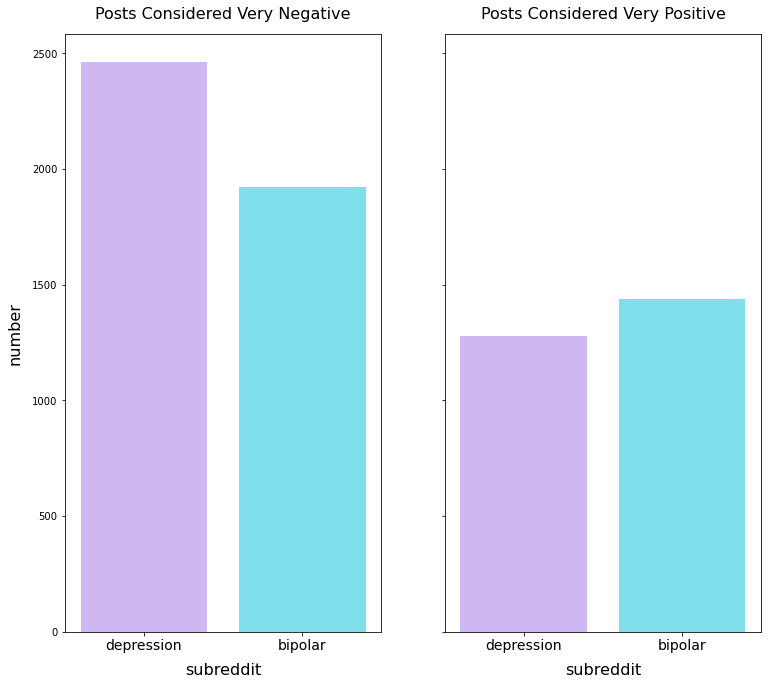

In [165]:
fig, axes = plt.subplots(1,2, figsize = (9,11), sharey = True)
axes[0] = sns.barplot(ax = axes[0], y = neg_counts, x = ['depression', 'bipolar'], palette = ['xkcd:pale violet', "xkcd:robin's egg"])
axes[0].set_title('Posts Considered Very Negative', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
axes[0].set_ylabel('number', fontsize = 16)
axes[0].set_xlabel('subreddit', fontsize = 16)
axes[0].xaxis.labelpad = 10
axes[0].yaxis.labelpad = 10 
axes[0].set_xticklabels(labels = ['depression', 'bipolar'], fontsize = 14)
plt.subplots_adjust(left=None, bottom = None, right=1.2, top=None, wspace=None, hspace=None)

axes[1] = sns.barplot(ax = axes[1], y = pos_counts, x = ['depression', 'bipolar'], palette = ['xkcd:pale violet', "xkcd:robin's egg"])
axes[1].set_title('Posts Considered Very Positive', {'horizontalalignment': 'center'}, fontsize = 16, pad=15)
axes[1].set_ylabel('', fontsize = 16)
axes[1].set_xlabel('subreddit', fontsize = 16)
axes[1].set_xticklabels(labels = ['depression', 'bipolar'], fontsize = 14)
axes[1].xaxis.labelpad = 10
axes[1].yaxis.labelpad = 10
plt.savefig('../images/sentiment_bar.png', dpi = 300, bbox_inches = "tight", transparent = True)
plt.show()

This could be very crucial. First thought would be to get rid of positive posts but this could be key to predicting right. 

# 
### What next? 
So at this point, I think we've realized our data is robust and most of it is necessary. We're definitely going to get rid of terms that occur too often in our dataset, but we will do that when we start modeling in the next part:

# 
**Up Next:**     
[Naive Bayes Model](./Naive_Bayes_Model.ipynb)  
  
[Return to Read Me](../README.md)